In [27]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from scipy.stats import linregress, shapiro, pearsonr, spearmanr # type: ignore
import scipy.stats as stats # type: ignore
import seaborn as sns # type: ignore
import statsmodels.api as sm
participants = ['BPM0004','BPM0005','BPM0006','BPM0007','BPM0008','BPM0009','BPM0010','BPM0011','BPM0012','BPM0013','BPM0014','BPM0015','BPM0016','BPM0017','BPM0018','BPM0019','BPM0020','BPM0021','BPM0022','BPM0023','BPM0024','BPM0025','BPM0026','BPM0027','BPM0028','BPM0029','BPM0032','BPM0033','BPM0034','BPM0035','BPM0036','BPM0038','BPM0040','BPM0041','BPM0042','BPM0044','BPM0045','BPM0046','BPM0047','BPM0048','BPM0049','BPM0050','BPM0051','BPM0052','BPM0053','BPM0054','BPM0055','BPM0056','BPM0057','BPM0058','BPM0059','BPM0060','BPM0061','BPM0062','BPM0063','BPM0064','BPM0065','BPM0066','BPM0067','BPM0068','BPM0069','BPM0070','BPM0071','BPM0072','BPM0073','BPM0074','BPM0075','BPM0076','BPM0077','BPM0078','BPM0079','BPM0080','BPM0081','BPM0082','BPM0083','BPM0084','BPM0085','BPM0088','BPM0089','BPM0090','BPM0091','BPM0092','BPM0093','BPM0094','BPM0095','BPM0096','BPM0097','BPM0098','BPM0099','BPM0100','BPM0101','BPM0102','BPM0103','BPM0104','BPM0105','BPM0106','BPM0107','BPM0108','BPM0109','BPM0110','BPM0111','BPM0112','BPM0113','BPM0114','BPM0115','BPM0117','BPM0118','BPM0119','BPM0120','BPM0121','BPM0122','BPM0123','BPM0124','BPM0125','BPM0126','BPM0127','BPM0128','BPM0129','BPM0130','BPM0131','BPM0132','BPM0133','BPM0134','BPM0135','BPM0136','BPM0137','BPM0138','BPM0139','BPM0141','BPM0142','BPM0143','BPM0148','BPM0149','BPM0153','BPM0154','BPM0155','BPM0158','BPM0161','BPM0162','BPM0165','BPM0167','BPM0169','BPM0171','BPM0175','BPM0176','BPM0177','BPM0178','BPM0179','BPM0181','BPM0182','BPM0183','BPM0185','BPM0186','BPM0188','BPM0192','BPM0193','BPM0194','BPM0195','BPM0196','BPM0197','BPM0198','BPM0202','BPM0205','BPM0208','BPM0209','BPM0210','BPM0211','BPM0212','BPM0213','BPM0214','BPM0215','BPM0216','BPM0220','BPM0221','BPM0224','BPM0225','BPM0226','BPM0227','BPM0228','BPM0229','BPM0230','BPM0231','BPM0232','BPM0233','BPM0234','BPM0235','BPM0236','BPM0237','BPM0238','BPM0239','BPM0240','BPM0241','BPM0242','BPM0243','BPM0244','BPM0245','BPM0246','BPM0247','BPM0248','BPM0249','BPM0250','BPM0251']
demo_table = pd.read_csv('demo_file.csv', delimiter=',')

#### Overall density values

    Participant  Average_REMA
0       BPM0004      7.038337
1       BPM0005      3.506616
2       BPM0006      2.454992
3       BPM0007      4.069930
4       BPM0008      2.680203
..          ...           ...
197     BPM0247      6.783891
198     BPM0248      8.694946
199     BPM0249     10.672938
200     BPM0250     14.405231
201     BPM0251     16.011236

[202 rows x 2 columns]


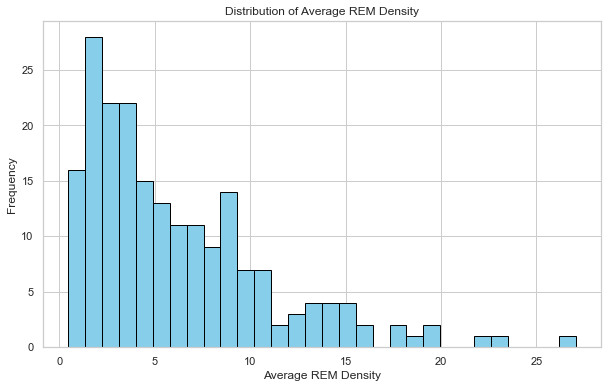

In [28]:
data_REM_phases = pd.read_csv('rem_details_merged.csv', delimiter=',')

# Calculate the duration in minutes for each REM phase
data_REM_phases['Duration_Minutes'] = (data_REM_phases['End_Second'] - data_REM_phases['Start_Second']) / 60

# Calculate the weighted REM density
data_REM_phases['Weighted_REM_Density'] = data_REM_phases['Duration_Minutes'] * data_REM_phases['REM_Density']

# Group by participant and calculate the total weighted REM density and total duration
grouped_data = data_REM_phases.groupby('Participant').agg(
    Total_Weighted_REM_Density=('Weighted_REM_Density', 'sum'),
    Total_Duration=('Duration_Minutes', 'sum')
)

# Calculate the average REMA per participant
grouped_data['Average_REMA'] = grouped_data['Total_Weighted_REM_Density'] / grouped_data['Total_Duration']

# Reset the index to flatten the DataFrame
grouped_data.reset_index(inplace=True)

# Save table for analysis
average_rema = grouped_data[['Participant', 'Average_REMA']]

# Display the results
print(average_rema)

# Plot the distribution of Average REMA
plt.figure(figsize=(10, 6))
plt.hist(grouped_data['Average_REMA'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Average REM Density')
plt.xlabel('Average REM Density')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#### REM phases + density with night quartiles

In [ ]:
# Load the data
data = pd.read_csv('all_results_filt_all.txt', delimiter=',', 
                   names=['Participant', 'Start Time', 'End Time', 'Artefact Value', 'Hypnogram Value', 'REM Detected', 'Max Amplitude', 'YASA Amplitude Peak'])

# Filter the data for relevant records based on participants and necessary data quality
data = data[data['Participant'].isin(participants)]
#data = data[(data['Artefact Value'] == 1) & (data['Max Amplitude'] != 0)]

# Convert 'REM Detected' to boolean
data['REM Detected'] = data['REM Detected'].astype(bool)

# Initialize a DataFrame to collect REM density results
rem_density_results = []

# Process each participant's data
for participant in data['Participant'].unique():
    print(participant)
    part_data = data[data['Participant'] == participant]
    # Calculate the full night duration from the first start to the last end time
    night_start = part_data['Start Time'].min()
    night_end = part_data['End Time'].max()
    night_duration = night_end - night_start

    # Define quartile bins
    quartile_edges = [
        night_start,
        night_start + night_duration * 0.25,
        night_start + night_duration * 0.5,
        night_start + night_duration * 0.75,
        night_end
    ]
    # Create quartile labels
    part_data['Quartile'] = pd.cut(part_data['Start Time'], bins=quartile_edges, labels=['Q1', 'Q2', 'Q3', 'Q4'], include_lowest=True)

    # Calculate REM density only for REM sleep periods
    for quartile in ['Q1', 'Q2', 'Q3', 'Q4']:
        quartile_data = part_data[(part_data['Quartile'] == quartile) & (part_data['Hypnogram Value'] == 2) & (data['Artefact Value'] == 1) & (data['Max Amplitude'] != 0)]

        if not quartile_data.empty:
            total_duration_minutes = (quartile_data['End Time'].max() - quartile_data['Start Time'].min()) / 60


            rem_count = quartile_data['REM Detected'].sum()
            rem_density = rem_count / total_duration_minutes if total_duration_minutes > 0 else 0
            
            rem_density_results.append({
                'Participant': participant,
                'Quartile': quartile,
                'REM_Density': rem_density,
                'Start Time': quartile_data['Start Time'].min() if not quartile_data.empty else None,
                'End Time': quartile_data['End Time'].max() if not quartile_data.empty else None
            })

# Convert the results to a DataFrame for analysis
rem_density_df = pd.DataFrame(rem_density_results)

# Output the DataFrame
rem_density_df.head()


In [29]:
file_path = r'C:\Users\Webpredict\Documents\MSCthesis\final_files\rem_density_df.csv'
#rem_density_df.to_csv(file_path, index=False)

## Visualization

In [30]:
rem_density_df = pd.read_csv('rem_density_df.csv', delimiter=',')
rem_density_df = rem_density_df.sort_values(by='Participant')

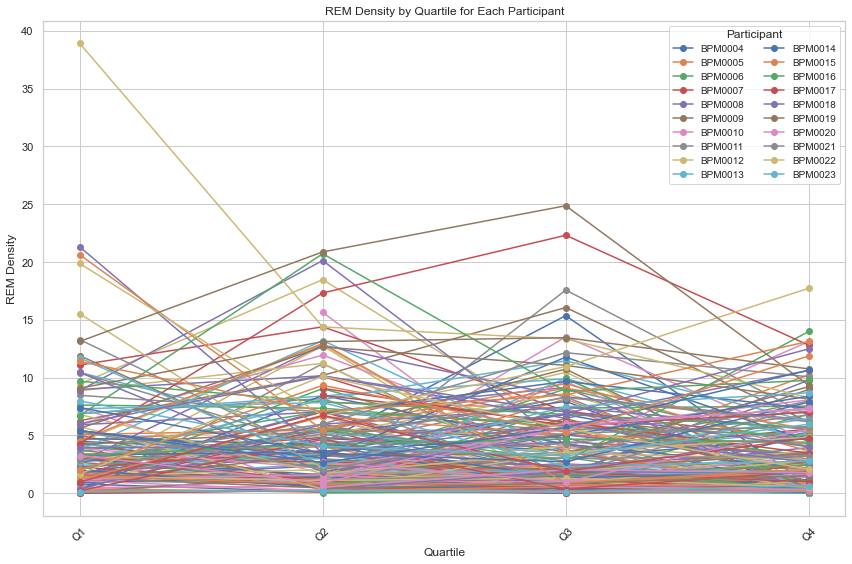

<Figure size 864x576 with 0 Axes>

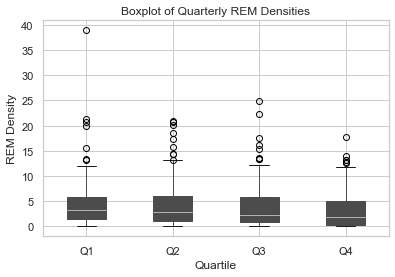

In [31]:
# Setup the plot
plt.figure(figsize=(12, 8))  # Adjust size as needed

# Getting the maximum number of REM phases to standardize the x-axis
max_rem_phases = rem_density_df['Quartile'].nunique()

# Unique list of participants
participant_list = rem_density_df['Participant'].unique()

# Plotting each participant's REM density data
for participant in participant_list:
    participant_data = rem_density_df[rem_density_df['Participant'] == participant]
    
    # Ensuring every participant has entries for all Quartiles, for consistency in the x-axis
    all_quartiles = ['Q1', 'Q2', 'Q3', 'Q4']
    participant_data.set_index('Quartile', inplace=True)
    participant_data = participant_data.reindex(all_quartiles)
    
    # Plotting the data
    plt.plot(participant_data.index, participant_data['REM_Density'], label=participant, marker='o')

# Adding plot title and labels
plt.title('REM Density by Quartile for Each Participant')
plt.xlabel('Quartile')
plt.ylabel('REM Density')

# Adding a legend, limited to show just a few participants due to possibly large number
plt.legend(title='Participant', loc='upper right', ncol=2, fontsize='small', labels=participants[:20])

# Show grid
plt.grid(True)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show the plot
plt.show()

# Assuming rem_density_df is already loaded with the necessary data
# and has columns 'Participant', 'Quartile', and 'REM_Density'

# Set up the plot
plt.figure(figsize=(12, 8))

# Create a boxplot for REM densities across different quartiles
boxplot = rem_density_df.boxplot(column='REM_Density', by='Quartile', grid=True, showfliers=True, notch=False, patch_artist=True)

plt.title('Boxplot of Quarterly REM Densities')
plt.suptitle('')  # Suppression of the default title to improve clarity
plt.xlabel('Quartile')
plt.ylabel('REM Density')
plt.grid(True)

# Show the plot
plt.show()

## Replace missing quartile averages with the age group density average

In [32]:
# Ensure the participant identifier is consistent across both dataframes
demo_table.rename(columns={'BPM': 'Participant'}, inplace=True)

# Merge the REM density data with demographic data
merged_data = pd.merge(rem_density_df, demo_table, on='Participant', how='left')

# Calculate the mean REM density for each age group
mean_rem_by_age_group = merged_data.groupby('age_group')['REM_Density'].mean()

# Fill missing REM densities with the average of their age group
merged_data['REM_Density'] = merged_data.apply(
    lambda row: mean_rem_by_age_group[row['age_group']] if pd.isna(row['REM_Density']) else row['REM_Density'],
    axis=1
)

# Print the updated DataFrame to verify changes
print(merged_data.head())


  Participant Quartile  REM_Density  Start Time  End Time   sex age  \
0     BPM0004       Q4     0.738530       22860     25541  male  27   
1     BPM0004       Q3    15.365551       16080     18501  male  27   
2     BPM0004       Q2     4.396336       10720     11921  male  27   
3     BPM0004       Q1     2.724796        4260      5361  male  27   
4     BPM0005       Q4     0.021333       22096     27721  male  26   

       age_group  
0  3_Young_adult  
1  3_Young_adult  
2  3_Young_adult  
3  3_Young_adult  
4  3_Young_adult  


## Calculate quartile slopes

In [33]:
# Assuming rem_density_df is loaded as before
# First, check if the DataFrame needs pivoting
if 'Quartile' in merged_data.columns:
    # Pivot the DataFrame safely ensuring all quartiles are present
    pivot_df = merged_data.pivot_table(index='Participant', columns='Quartile', values='REM_Density', fill_value=0)
else:
    pivot_df = merged_data  # If it's already pivoted correctly

# Make sure we have all quartiles; add them if missing & Columns to fill
quartile_columns = ['Q1', 'Q2', 'Q3', 'Q4']

for quartile in quartile_columns:
    if quartile not in pivot_df.columns:
        pivot_df[quartile] = 0  # Assuming missing data can be treated as zero density

# Merge the REM density data with demographic data
pivot_df = pd.merge(pivot_df, demo_table, on='Participant', how='left')
#pivot_df['age'] = pd.to_numeric(pivot_df['age'].str.replace(',', '.'), errors='coerce')

# Calculate the mean for each quartile by age group
mean_by_quartile_age_group = pivot_df.groupby('age_group')[quartile_columns].transform('mean')

# Fill missing values in quartiles with the average of their age group
for col in quartile_columns:
    pivot_df[col] = pivot_df[col].fillna(pivot_df.groupby('age_group')[col].transform('mean'))

# Calculate slopes between consecutive quartiles
pivot_df['Slope_Q1_to_Q2'] = pivot_df['Q2'] - pivot_df['Q1']
pivot_df['Slope_Q2_to_Q3'] = pivot_df['Q3'] - pivot_df['Q2']
pivot_df['Slope_Q3_to_Q4'] = pivot_df['Q4'] - pivot_df['Q3']

# Reset index if necessary to flatten the DataFrame
pivot_df.reset_index(inplace=True)

# Display the updated DataFrame
print(pivot_df[['Participant', 'Slope_Q1_to_Q2', 'Slope_Q2_to_Q3', 'Slope_Q3_to_Q4']])

# Additional statistics if needed
print('First slope positive: ' + str(len(pivot_df[pivot_df['Slope_Q1_to_Q2'] > 0])))
print('Second slope positive: ' + str(len(pivot_df[pivot_df['Slope_Q2_to_Q3'] > 0])))
print('Third slope positive: ' + str(len(pivot_df[pivot_df['Slope_Q3_to_Q4'] > 0])))
print('Second slope greater than first: ' + str(len(pivot_df[pivot_df['Slope_Q2_to_Q3'] > pivot_df['Slope_Q1_to_Q2']])))
print('Third slope greater than second: ' + str(len(pivot_df[pivot_df['Slope_Q3_to_Q4'] > pivot_df['Slope_Q2_to_Q3']])))
print('Total participants with slopes: ' + str(len(pivot_df)))



    Participant  Slope_Q1_to_Q2  Slope_Q2_to_Q3  Slope_Q3_to_Q4
0       BPM0004        1.671541       10.969215      -14.627021
1       BPM0005       -0.893041        0.505023       -1.412281
2       BPM0006       -3.055526       -1.105189       -1.044346
3       BPM0007        5.449514       -5.635495       -1.354033
4       BPM0008        3.154323        0.267781       -5.363282
..          ...             ...             ...             ...
197     BPM0247        4.668094        3.614333       -2.084625
198     BPM0248        8.458343       -4.534416       -3.487466
199     BPM0249       -3.904744       -0.843629        2.741700
200     BPM0250       -2.764135        3.037195        4.955112
201     BPM0251        7.346030       -4.065394        6.603842

[202 rows x 4 columns]
First slope positive: 142
Second slope positive: 99
Third slope positive: 85
Second slope greater than first: 90
Third slope greater than second: 107
Total participants with slopes: 202


In [38]:
pivot_df['Slope_Q1_to_Q2'].mean()
pivot_df['Slope_Q2_to_Q3'].mean()
pivot_df['Slope_Q3_to_Q4'].mean()

-0.6703350813919351

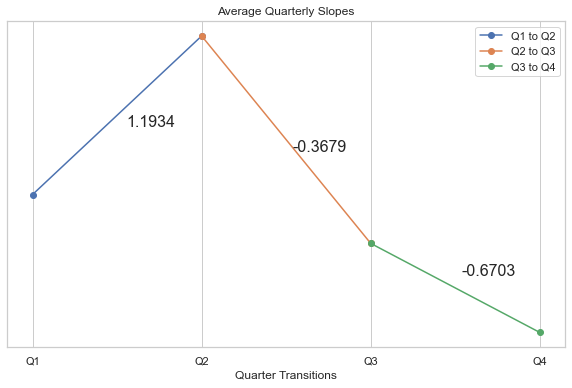

In [53]:
# Calculate the average slopes
avg_slope_q1_q2 = pivot_df['Slope_Q1_to_Q2'].mean()
avg_slope_q2_q3 = pivot_df['Slope_Q2_to_Q3'].mean()
avg_slope_q3_q4 = pivot_df['Slope_Q3_to_Q4'].mean()

# Plotting separate lines for each average slope calculation
plt.figure(figsize=(10, 6))
x = ['Q1', 'Q2', 'Q3', 'Q4']
y_base = 0  # Starting y-value, you can adjust this to center or align the slopes

# Creating lines with average slopes
plt.plot(x[:2], [y_base, y_base + avg_slope_q1_q2], marker='o', linestyle='-', label='Q1 to Q2')
plt.plot(x[1:3], [y_base + avg_slope_q1_q2, y_base + avg_slope_q2_q3], marker='o', linestyle='-', label='Q2 to Q3')
plt.plot(x[2:], [y_base + avg_slope_q2_q3, y_base + avg_slope_q2_q3 + avg_slope_q3_q4], marker='o', linestyle='-', label='Q3 to Q4')

# Annotating the slope values above each section of the line
plt.text(0.7, y_base + avg_slope_q1_q2 / 2, f'{avg_slope_q1_q2:.4f}', va='top', ha='center', size = 16)
plt.text(1.7, y_base + avg_slope_q1_q2 + (avg_slope_q2_q3 - avg_slope_q1_q2) / 2, f'{avg_slope_q2_q3:.4f}', va='top', ha='center', size = 16)
plt.text(2.7, y_base + avg_slope_q2_q3 + (avg_slope_q3_q4 - avg_slope_q2_q3) / 2, f'{avg_slope_q3_q4:.4f}', va='top', ha='center', size = 16)

plt.title('Average Quarterly Slopes')
plt.xlabel('Quarter Transitions')
plt.grid(True)
plt.legend()
plt.gca().axes.yaxis.set_visible(False)  # Hide the y-axis
plt.show()

## Cohen's d test for effect size

Descriptive Statistics for Slopes:
       Slope_Q1_to_Q2  Slope_Q2_to_Q3  Slope_Q3_to_Q4
count      202.000000      202.000000      202.000000
mean         1.193409       -0.367946       -0.670335
std          4.999260        4.476368        3.944541
min        -24.528203      -15.963569      -15.534320
25%         -0.330952       -1.841397       -1.895559
50%          0.944499       -0.057215       -0.235243
75%          3.195420        1.522508        1.176511
max         15.655431       16.318414       11.222831

Normality Tests for Slopes:
Slope_Q1_to_Q2: ShapiroResult(statistic=0.9010947346687317, pvalue=2.549427891018752e-10)
Slope_Q2_to_Q3: ShapiroResult(statistic=0.9397699236869812, pvalue=1.9450611432603182e-07)
Slope_Q3_to_Q4: ShapiroResult(statistic=0.9310793280601501, pvalue=3.631669542869531e-08)

Wilcoxon Tests between Quartiles:
Wilcoxon test between Slope_Q1_to_Q2 and Slope_Q2_to_Q3: Stat=8225.0, p-value=0.014845220738246723
Cohen's d between Slope_Q1_to_Q2 and Slope_Q2

<Figure size 720x432 with 0 Axes>

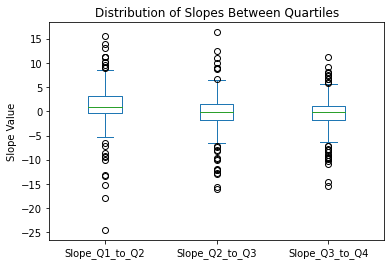

In [9]:
# Function to calculate Cohen's d for effect size
def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1) ** 2 + (ny-1)*np.std(y, ddof=1) ** 2) / dof)

# Assuming 'pivot_df' is your DataFrame and contains slopes
# Example: if not, replace this with your actual DataFrame loading or preparation code
# pivot_df = pd.read_csv('pivot_df.csv')

# Print descriptive statistics
print("Descriptive Statistics for Slopes:")
print(pivot_df[['Slope_Q1_to_Q2', 'Slope_Q2_to_Q3', 'Slope_Q3_to_Q4']].describe())

# Normality Tests
print("\nNormality Tests for Slopes:")
print("Slope_Q1_to_Q2:", stats.shapiro(pivot_df['Slope_Q1_to_Q2']))
print("Slope_Q2_to_Q3:", stats.shapiro(pivot_df['Slope_Q2_to_Q3']))
print("Slope_Q3_to_Q4:", stats.shapiro(pivot_df['Slope_Q3_to_Q4']))

# Perform statistical tests for slope comparisons
print("\nWilcoxon Tests between Quartiles:")
for i in range(1, 4):
    slope_1 = f'Slope_Q{i}_to_Q{i+1}'
    if i < 3:
        slope_2 = f'Slope_Q{i+1}_to_Q{i+2}'
        stat, p_val = stats.wilcoxon(pivot_df[slope_1], pivot_df[slope_2])
        print(f"Wilcoxon test between {slope_1} and {slope_2}: Stat={stat}, p-value={p_val}")
        effect_size = cohen_d(pivot_df[slope_1], pivot_df[slope_2])
        print(f"Cohen's d between {slope_1} and {slope_2}: {effect_size}")

# Plotting boxplots for visual inspection of slope distributions
plt.figure(figsize=(10, 6))
pivot_df[['Slope_Q1_to_Q2', 'Slope_Q2_to_Q3', 'Slope_Q3_to_Q4']].plot(kind='box')
plt.title('Distribution of Slopes Between Quartiles')
plt.ylabel('Slope Value')
plt.show()


The evaluation of your results reveals several significant insights into the distribution and behavior of slope values across different quartiles. Here's a detailed analysis of each part of the results:

### 1. Descriptive Statistics for Slopes
- **Mean:** The average slope between Q1 and Q2 is positive (1.261536), suggesting an increase in REM density as the night progresses into the second quartile. However, the mean values become negative for the transitions from Q2 to Q3 and Q3 to Q4, indicating a decline in REM density in these later periods.
- **Standard Deviation:** High standard deviations relative to the means suggest considerable variability in REM density changes between individuals or nights within the same individual.
- **Minimum and Maximum:** The ranges of the slopes, from very negative to quite positive, highlight extreme cases where REM density may sharply increase or decrease.

### 2. Normality Tests
- The Shapiro-Wilk test results indicate that the distributions of slope values for all three transitions (Q1 to Q2, Q2 to Q3, Q3 to Q4) significantly deviate from normality (p-values < 0.05). This non-normality needs to be considered when choosing statistical tests and interpreting their results.

### 3. Wilcoxon Signed-Rank Tests
- **Slope_Q1_to_Q2 vs. Slope_Q2_to_Q3:** The significant result (p-value = 0.01669) suggests that the median slopes between these quartiles are statistically different. The effect size (Cohen's d = 0.3418) is small to moderate, indicating a noticeable but not large difference in the change rates of REM density between the first two transitions.
- **Slope_Q2_to_Q3 vs. Slope_Q3_to_Q4:** The non-significant result (p-value = 0.7774) suggests no statistical difference in the median slopes between these transitions. The very small effect size (Cohen's d = 0.09086) further supports the lack of a meaningful difference.

### Interpretation and Recommendations:
- **REM Density Trends:** The analysis suggests that REM density increases initially but then tends to decrease as the night progresses beyond the mid-point. This could align with typical sleep architecture where REM sleep is more frequent and prolonged towards the morning but might start decreasing very late in the sleep cycle or as one approaches waking times.
- **Data Distribution and Analysis Methods:** Given the non-normal distribution of slopes, non-parametric methods (like Wilcoxon tests) are appropriate. The findings are robust in this regard.
- **Further Investigations:** To understand why these patterns occur (especially the initial increase followed by a decrease), further analysis could be conducted considering other physiological or external factors that might influence REM sleep. Additionally, examining individual participant data might reveal specific patterns or outliers influencing these results.

In conclusion, your analysis provides valuable insights into how REM density changes throughout the night. These findings can inform hypotheses about sleep regulation and its physiological underpinnings, potentially guiding further research in sleep studies or clinical evaluations of sleep quality.

## Regression line

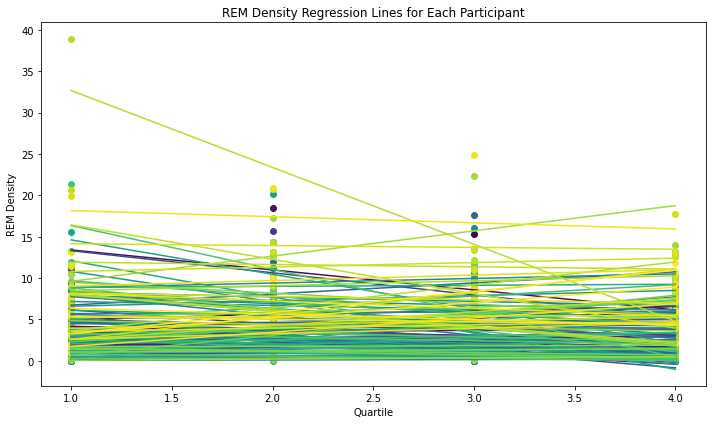

In [10]:
# Sample DataFrame setup
# Assuming 'rem_density_df' is your DataFrame that includes the following columns:
# 'Participant', 'Quartile', 'REM_Density', 'Start Time', 'End Time'
# Let's assume 'Quartile' values are ['Q1', 'Q2', 'Q3', 'Q4'] mapped to [1, 2, 3, 4] for simplicity in plotting.

# Pivot the DataFrame to have one row per participant with quartiles as columns
plot_df = rem_density_df.pivot(index='Participant', columns='Quartile', values='REM_Density')

# Plot setup
fig, ax = plt.subplots(figsize=(10, 6))

# Generate a color palette
color_palette = plt.cm.viridis(np.linspace(0, 1, len(plot_df)))

# Iterate through each participant to plot
for i, (participant, row) in enumerate(plot_df.iterrows()):
    # Prepare data
    x = np.array([1, 2, 3, 4])  # Corresponds to 'Q1', 'Q2', 'Q3', 'Q4'
    y = row.values
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    # Create a line space for plotting the regression line
    line_x = np.linspace(x.min(), x.max(), 100)
    line_y = slope * line_x + intercept
    # Plotting
    ax.scatter(x, y, color=color_palette[i], label=f'Participant {participant}')
    ax.plot(line_x, line_y, color=color_palette[i], label=f'Regression for {participant}')

# Adding plot title and labels
ax.set_title('REM Density Regression Lines for Each Participant')
ax.set_xlabel('Quartile')
ax.set_ylabel('REM Density')

# Show the legend
#ax.legend(title='Participants', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


## Night half comparison

In [11]:
# Assuming 'pivot_df' contains the pivoted REM densities with each quartile as columns
# Calculate the sum of REM densities for the first two quartiles and the last two quartiles
pivot_df['First_Half'] = pivot_df['Q1'] + pivot_df['Q2']
pivot_df['Second_Half'] = pivot_df['Q3'] + pivot_df['Q4']

# Calculate the ratio of the second half over the first half
pivot_df['Half_Night_Ratio'] = pivot_df['Second_Half'] / pivot_df['First_Half']

# Optional: Perform statistical analysis on these ratios
# Example: Checking the distribution of these ratios
mean_ratio = pivot_df['Half_Night_Ratio'].mean()
median_ratio = pivot_df['Half_Night_Ratio'].median()

# Display the calculated ratios and statistics
print(pivot_df[['Half_Night_Ratio', 'First_Half', 'Second_Half']])
print(f"Mean Ratio: {mean_ratio}, Median Ratio: {median_ratio}")

# Further analysis could involve statistical tests or more complex modeling


     Half_Night_Ratio  First_Half  Second_Half
0            2.261450    7.121132    16.104082
1            0.529029    2.750223     1.454947
2            0.192364    7.813235     1.502986
3            0.167447    8.618679     1.443170
4            0.776632    7.491672     5.818274
..                ...         ...          ...
197          3.101957    4.668094    14.480230
198          0.652370   11.788250     7.690296
199          0.763696   12.061992     9.211690
200          2.023524    8.075398    16.340765
201          1.513946   11.322361    17.141445

[202 rows x 3 columns]
Mean Ratio: inf, Median Ratio: 1.0264979202435418


Shapiro-Wilk Normality Test result: ShapiroResult(statistic=0.5710510015487671, pvalue=4.257990962989487e-22)
Data is not normally distributed, performing a Wilcoxon signed-rank test:
Wilcoxon Signed-Rank Test Result: WilcoxonResult(statistic=10185.0, pvalue=0.9362832330458055)


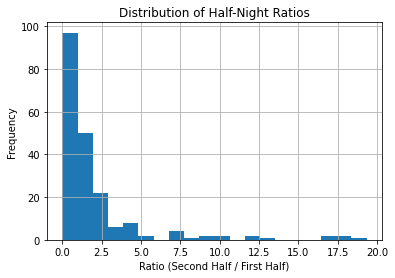

In [12]:
# Calculating the sum of REM densities for the first two and the last two quartiles
pivot_df['First_Half'] = pivot_df['Q1'] + pivot_df['Q2']
pivot_df['Second_Half'] = pivot_df['Q3'] + pivot_df['Q4']

# Calculate the ratio of the second half over the first half
pivot_df['Half_Night_Ratio'] = pivot_df['Second_Half'] / pivot_df['First_Half']

# Replace infinity with 0
pivot_df['Half_Night_Ratio'].replace([np.inf, -np.inf], 0, inplace=True)


# Normality Test on the half-night ratio
shapiro_test = stats.shapiro(pivot_df['Half_Night_Ratio'])
print(f"Shapiro-Wilk Normality Test result: {shapiro_test}")

# If p-value > 0.05, data is considered normally distributed
if shapiro_test.pvalue > 0.05:
    print("Data is normally distributed, performing a paired t-test:")
    # T-test for comparing first half vs second half (if you have comparable paired measures)
    t_test_result = stats.ttest_rel(pivot_df['First_Half'], pivot_df['Second_Half'])
    print(f"Paired T-test Result: {t_test_result}")
else:
    print("Data is not normally distributed, performing a Wilcoxon signed-rank test:")
    # Wilcoxon signed-rank test for non-normal distributions
    wilcoxon_result = stats.wilcoxon(pivot_df['First_Half'], pivot_df['Second_Half'])
    print(f"Wilcoxon Signed-Rank Test Result: {wilcoxon_result}")

# Plotting the distribution of Half-Night Ratios
plt.figure()
pivot_df['Half_Night_Ratio'].hist(bins=20)
plt.title('Distribution of Half-Night Ratios')
plt.xlabel('Ratio (Second Half / First Half)')
plt.ylabel('Frequency')
plt.show()

## Demographic variables
### Descriptive statistics

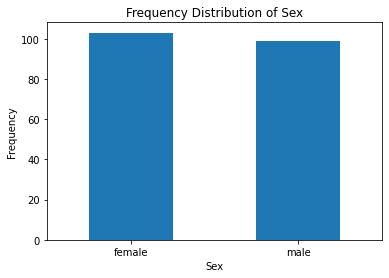

female    103
male       99
Name: sex, dtype: int64


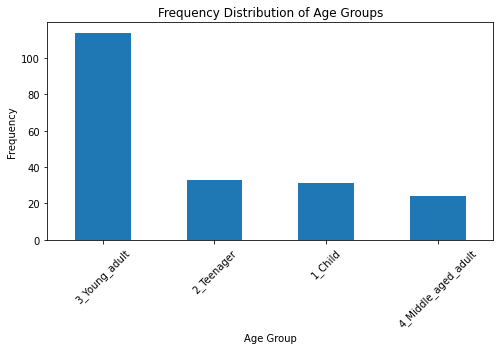

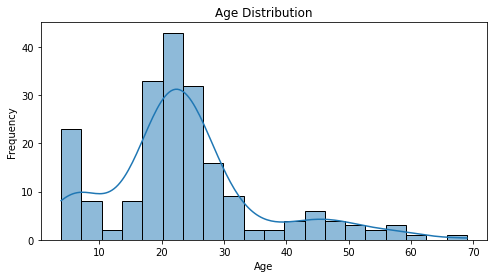

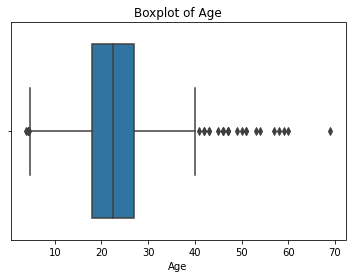

Summary Statistics for Age:
count    202.000000
mean      23.495050
std       12.220982
min        3.840000
25%       18.000000
50%       22.500000
75%       27.000000
max       69.000000
Name: age, dtype: float64


In [13]:
# Assuming you've loaded your data into a DataFrame named `demo_table`
demo_table = pd.read_csv('demo_file.csv')

# Convert age to numeric, assuming the column may contain commas as decimal points
demo_table['age'] = pd.to_numeric(demo_table['age'].str.replace(',', '.'), errors='coerce')

# Only investigate the relevant participants
demo_table = demo_table[demo_table['BPM'].isin(participants)]

# Frequency distribution for sex
sex_counts = demo_table['sex'].value_counts()
plt.figure(figsize=(6, 4))
sex_counts.plot(kind='bar')
plt.title('Frequency Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()
print(demo_table['sex'].value_counts())

# Frequency distribution for age groups
age_group_counts = demo_table['age_group'].value_counts()
plt.figure(figsize=(8, 4))
age_group_counts.plot(kind='bar')
plt.title('Frequency Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Histogram of ages
plt.figure(figsize=(8, 4))
sns.histplot(demo_table['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Boxplot of ages
plt.figure(figsize=(6, 4))
sns.boxplot(x=demo_table['age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

# Summary statistics for age
print("Summary Statistics for Age:")
print(demo_table['age'].describe())



### Average REMA x Age

In [14]:
# Merge the two dataframes 
average_rema_age = pd.merge(demo_table, average_rema, left_on = 'BPM', right_on='Participant')

# Descriptive statistics
print(average_rema_age[['age', 'Average_REMA']].describe())


              age  Average_REMA
count  202.000000    202.000000
mean    23.495050      6.172282
std     12.220982      4.857315
min      3.840000      0.462585
25%     18.000000      2.377493
50%     22.500000      4.748671
75%     27.000000      8.640134
max     69.000000     27.052195


## Correlate Age with Average REM Density

Correlation Coefficient: -0.2822284765875035 P-value: 4.714175209219006e-05


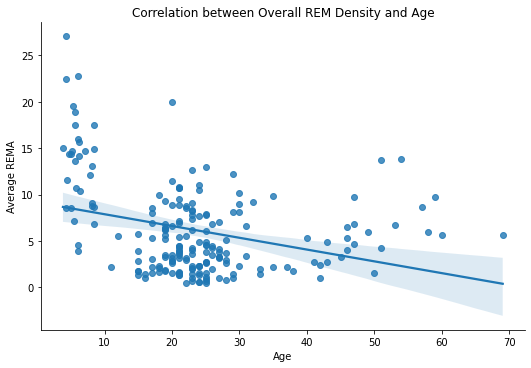

In [15]:
# Assuming 'average_rema_age' is your DataFrame and it has 'age' and 'Average_REMA' columns.

# First, perform Shapiro-Wilk test for normality on both 'age' and 'Average_REMA'.
shapiro_age_result = shapiro(average_rema_age['age'])
shapiro_rema_result = shapiro(average_rema_age['Average_REMA'])

# Choose which correlation to use based on the normality test result.
if shapiro_age_result.pvalue > 0.05 and shapiro_rema_result.pvalue > 0.05:
    # Data is normally distributed, use Pearson correlation
    corr_coef, p_value = pearsonr(average_rema_age['age'], average_rema_age['Average_REMA'])
else:
    # Data is not normally distributed, use Spearman correlation
    corr_coef, p_value = spearmanr(average_rema_age['age'], average_rema_age['Average_REMA'])

# Print the correlation coefficient and p-value
print("Correlation Coefficient:", corr_coef, "P-value:", p_value)

# Create the scatter plot with regression line
sns.lmplot(x='age', y='Average_REMA', data=average_rema_age, aspect=1.5)
plt.title('Correlation between Overall REM Density and Age')
plt.xlabel('Age')
plt.ylabel('Average REMA')

# Display the plot
plt.show()

Since neither the 'age' nor the 'Average_REMA' distributions are normal, using parametric tests that assume normality (like the t-test for comparing means) might not be appropriate without transformations or adjustments. Non-parametric tests, which do not assume normal distribution, might be more suitable for analyzing data with these characteristics. 

Given the results from your Shapiro-Wilk test indicating that neither 'age' nor 'Average_REMA' are normally distributed, using Spearman's rank correlation coefficient (Spearman's rho) is an appropriate choice. This method does not assume that the data are normally distributed, making it suitable for your dataset.

### Results Explained:
- **Correlation Coefficient: -0.2559**
  - This value represents the Spearman's rank correlation coefficient between 'age' and 'Average_REMA'. The negative sign indicates an inverse relationship, meaning that as 'age' increases, the 'Average_REMA' tends to decrease.
  - The magnitude of the coefficient, 0.2559, suggests a weak to moderate negative correlation. This isn't a very strong relationship, but it's significant enough to be notable.

- **P-value: 0.000264**
  - The p-value tells you the probability of observing your data, or data more extreme, if the null hypothesis (no correlation) were true.
  - A p-value of 0.000264 is very small (less than 0.05), allowing you to reject the null hypothesis that there is no correlation between 'age' and 'Average_REMA'. This means that the observed correlation is statistically significant.

### Interpretation:
The results suggest that there is a statistically significant but weak inverse correlation between 'age' and 'Average_REMA' in your dataset. This could imply that younger participants tend to have higher REM activity metrics compared to older ones, although the relationship is not particularly strong.

These insights can be useful in understanding the dynamics of REM sleep across different age groups, particularly in studies related to sleep quality and age-related changes in sleep patterns. However, the correlation's strength suggests that other factors likely also play a significant role in determining REM activity, and age alone does not strongly predict REM sleep characteristics.

## Correlate Age with Quartile REM Density
Use correlation tests to analyze the relationship between age and REM density in each quartile. This can help determine if the pattern of REM sleep changes with age throughout the night.


ShapiroResult(statistic=0.906851589679718, pvalue=8.136285829977961e-21)
Spearman Correlation for Q1: Correlation=-0.17158832047478717, P-value=0.04578001721670867
Spearman Correlation for Q2: Correlation=-0.08652195996109142, P-value=0.22313979750129567
Spearman Correlation for Q3: Correlation=-0.2627290911403544, P-value=0.00017093193108028306
Spearman Correlation for Q4: Correlation=-0.33643450440395595, P-value=9.80974335128978e-07


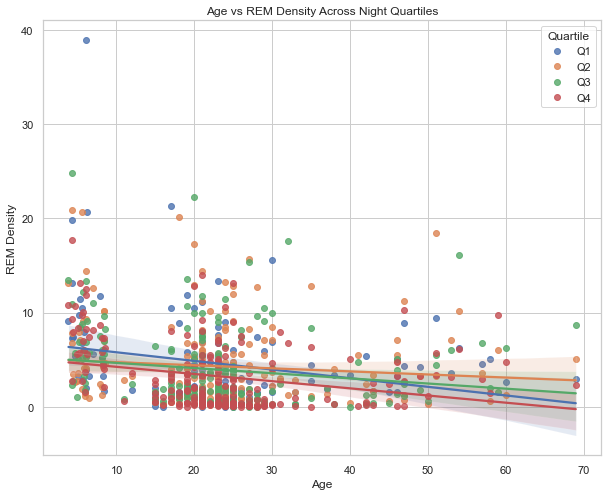

In [16]:
# Check for normality to decide on Pearson or Spearman correlation
# For this example, let's assume we've already loaded and merged our DataFrame correctly
merged_data['age'] = pd.to_numeric(merged_data['age'].str.replace(',', '.'), errors='coerce')
print(stats.shapiro(merged_data['age']))  # Check normality for 'Age'
# Assuming normality tests for REM density by quartile are also done similarly

# Let's assume we find that data is not normally distributed and choose Spearman's correlation
correlation_results = {}
for quartile in ['Q1', 'Q2', 'Q3', 'Q4']:
    quartile_data = merged_data[merged_data['Quartile'] == quartile]
    corr, p_value = stats.spearmanr(quartile_data['age'], quartile_data['REM_Density'])
    correlation_results[quartile] = (corr, p_value)
    print(f"Spearman Correlation for {quartile}: Correlation={corr}, P-value={p_value}")

# Visualization
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

for quartile in ['Q1', 'Q2', 'Q3', 'Q4']:
    quartile_data = merged_data[merged_data['Quartile'] == quartile]
    sns.regplot(x='age', y='REM_Density', data=quartile_data, label=quartile, fit_reg=True)

plt.title('Age vs REM Density Across Night Quartiles')
plt.xlabel('Age')
plt.ylabel('REM Density')
plt.legend(title='Quartile')
plt.show()


## Correlate Age with Slopes Between Quartiles
Analyze how the rate of change in REM density (slopes) correlates with age to see if older or younger age groups experience sharper or more gradual changes in REM density as the night progresses.


ShapiroResult(statistic=0.9072808027267456, pvalue=6.501844063144802e-10)
ShapiroResult(statistic=0.9010947346687317, pvalue=2.549427891018752e-10)
ShapiroResult(statistic=0.9397699236869812, pvalue=1.9450611432603182e-07)
Correlation between Age and Slope_Q1_to_Q2: Coefficient=0.049159552309956465, P-value=0.48719769320020245
Correlation between Age and Slope_Q2_to_Q3: Coefficient=-0.1414375411811394, P-value=0.044660818674950066
Correlation between Age and Slope_Q3_to_Q4: Coefficient=-0.08704465517791955, P-value=0.21802419242402898


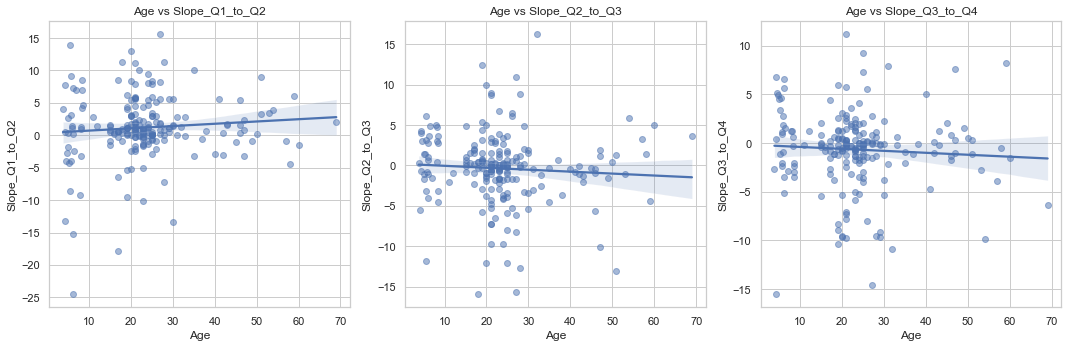

In [17]:
pivot_df['age'] = pd.to_numeric(pivot_df['age'].str.replace(',', '.'), errors='coerce')

# Assume pivot_df is loaded and contains the necessary columns
# Checking normality for age and slopes
print(stats.shapiro(pivot_df['age'].dropna()))
print(stats.shapiro(pivot_df['Slope_Q1_to_Q2'].dropna()))
print(stats.shapiro(pivot_df['Slope_Q2_to_Q3'].dropna()))

# Function to perform correlation based on normality
def perform_correlation(data, col1, col2):
    if stats.shapiro(data[col1].dropna())[1] > 0.05 and stats.shapiro(data[col2].dropna())[1] > 0.05:
        corr_coef, p_value = stats.pearsonr(data[col1], data[col2])
    else:
        corr_coef, p_value = stats.spearmanr(data[col1], data[col2])
    return corr_coef, p_value

# Apply correlation for each slope against age
for slope in ['Slope_Q1_to_Q2', 'Slope_Q2_to_Q3', 'Slope_Q3_to_Q4']:
    corr_coef, p_value = perform_correlation(pivot_df, 'age', slope)
    print(f"Correlation between Age and {slope}: Coefficient={corr_coef}, P-value={p_value}")

plt.figure(figsize=(15, 5))
for i, slope in enumerate(['Slope_Q1_to_Q2', 'Slope_Q2_to_Q3', 'Slope_Q3_to_Q4'], 1):
    plt.subplot(1, 3, i)
    sns.regplot(x='age', y=slope, data=pivot_df, scatter_kws={'alpha':0.5})
    plt.title(f'Age vs {slope}')
    plt.xlabel('Age')
    plt.ylabel(slope)

plt.tight_layout()
plt.show()


## Correlate Age with Half-Night REM Ratios
Explore if there is a significant relationship between age and the ratio of second half-night REM density to first half-night REM density, which can indicate age-related differences in the accumulation of REM pressure.

ShapiroResult(statistic=0.9072808027267456, pvalue=6.501844063144802e-10)
ShapiroResult(statistic=0.5710510015487671, pvalue=4.257990962989487e-22)
Spearman Correlation Coefficient: -0.15512510640794216 P-value: 0.02749472721883904
                 Generalized Linear Model Regression Results                  
Dep. Variable:       Half_Night_Ratio   No. Observations:                  202
Model:                            GLM   Df Residuals:                      200
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                          2.5000
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Thu, 18 Apr 2024   Deviance:                       518.54
Time:                        20:44:50   Pearson chi2:                     500.
No. Iterations:                    13   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                    

c:\Users\Webpredict\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:777: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
c:\Users\Webpredict\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1767: RuntimeWarning: invalid value encountered in scalar subtract
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


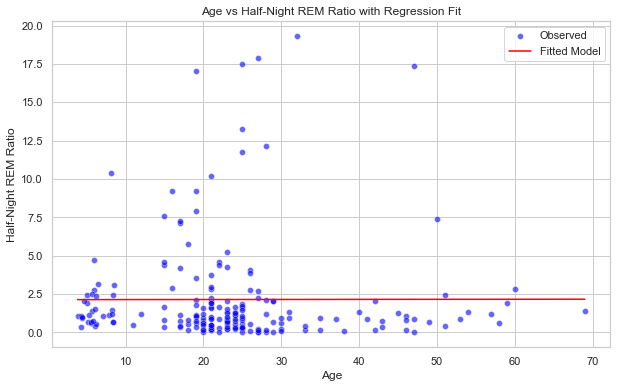

In [18]:
# Check for normality to decide on Pearson or Spearman correlation
print(stats.shapiro(pivot_df['age'].dropna()))  # Check normality for 'Age'
print(stats.shapiro(pivot_df['Half_Night_Ratio'].dropna()))  # Check normality for 'Half_Night_Ratio'

corr_coef, p_value = stats.spearmanr(pivot_df['age'], pivot_df['Half_Night_Ratio'])
print("Spearman Correlation Coefficient:", corr_coef, "P-value:", p_value)

# Prepare data by adding a constant term for intercept
X = sm.add_constant(pivot_df['age'])
y = pivot_df['Half_Night_Ratio']

# Fit a GLM model
model = sm.GLM(y, X, family=sm.families.Gamma(sm.families.links.log())).fit()
print(model.summary())

# Predict values
pivot_df['predicted_ratio'] = model.predict(X)

# Plotting the observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='Half_Night_Ratio', data=pivot_df, color='blue', alpha=0.6, label='Observed')
sns.lineplot(x='age', y='predicted_ratio', data=pivot_df, color='red', label='Fitted Model')
plt.title('Age vs Half-Night REM Ratio with Regression Fit')
plt.xlabel('Age')
plt.ylabel('Half-Night REM Ratio')
plt.legend()
plt.grid(True)
plt.show()
